In [4]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.imports import *

In [0]:
bs = 16

In [0]:
folder = 'ripe'
file = 'urls_ripe.csv'

In [0]:
folder = 'rotten'
file = 'urls_rotten.csv'

In [0]:
path = Path(base_dir + 'data/fruits')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/fruits/ripe'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/fruits/rotten'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/fruits/models')]

In [0]:
classes = ['rotten', 'ripe']

In [0]:
download_images(dest/file, dest, max_pics=500, max_workers=0)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes


['ripe', 'rotten']

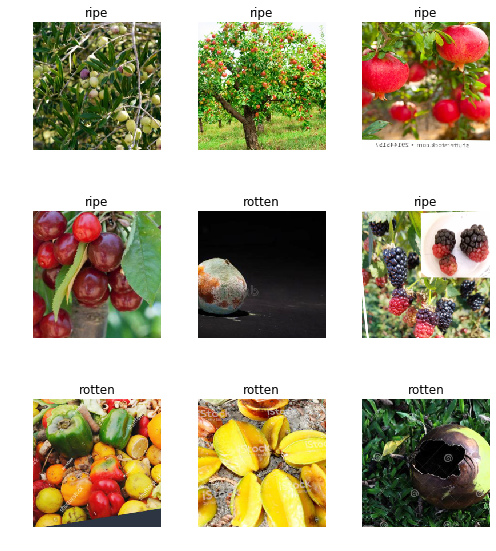

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
error_rate??

In [39]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 146485877.27it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


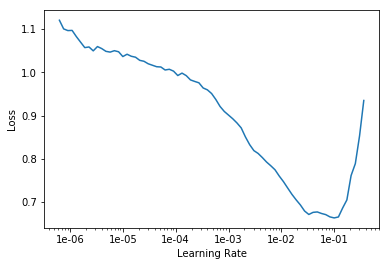

In [40]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 2e-3

In [42]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ripe', 'rotten'], 2, 576, 144)

In [43]:
learn.fit_one_cycle(4, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.867482,0.435324,0.770833,00:11
1,0.635304,0.349077,0.868056,00:10
2,0.530575,0.344275,0.868056,00:10
3,0.454778,0.347197,0.875000,00:10


In [0]:
learn.unfreeze()

In [45]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


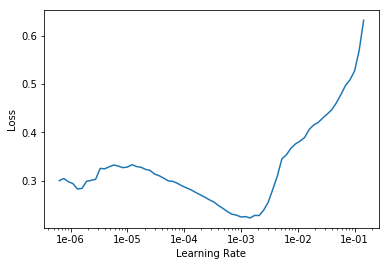

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.302453,0.377853,0.888889,00:11
1,0.245364,0.458198,0.868056,00:11
2,0.201837,0.297189,0.930556,00:11
3,0.156967,0.268410,0.916667,00:11


In [0]:
learn.save('net34-stage1')

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=500, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.load('net34-stage1')

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


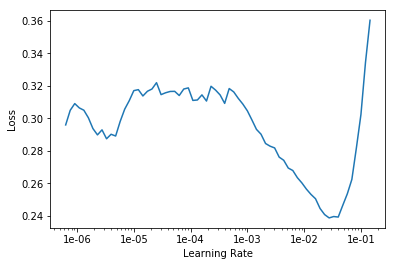

In [20]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(4, max_lr=1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.283691,0.119465,0.972222,00:33
1,0.225204,0.100242,0.951389,00:32
2,0.188998,0.106006,0.958333,00:31
3,0.168942,0.108531,0.958333,00:32


In [0]:
learn.save('net34-stage2')

In [0]:
learn.unfreeze()

In [0]:
learn.load('net34-stage2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

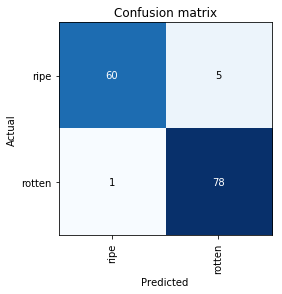

In [29]:
interp.plot_confusion_matrix()